In [1]:
# Import necessary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Import the dataset
data = pd.read_csv('final_clean_car_data2.csv')

In [6]:
data.head()

,Name,Transimission_Type,Engine_Size,Usage_Origin,Year,Price,Make,Model,Car_Age,Price_Range
0,Volvo S60,Automatic,1500.0,Kenyan Used,2016,1699999.0,Volvo,S60,8,1M-2M
1,Toyota Landcruiser Prado,Automatic,2700.0,Kenyan Used,2017,5799999.0,Toyota,Landcruiser Prado,7,5M-10M
2,Mazda Cx3,Automatic,2000.0,Foreign Used,2017,2499999.0,Mazda,Cx3,7,2M-3M
3,Toyota Cami,Automatic,1300.0,Kenyan Used,2004,579999.0,Toyota,Cami,20,0-1M
4,Bmw X1,Automatic,2000.0,Foreign Used,2017,3799999.0,Bmw,X1,7,3M-5M


# 1.Univariate Analysis 

## Categorical variables

### a.Transmission_type

In [7]:
# Count
transmission_count = data['Transimission_Type'].value_counts().reset_index()
transmission_count

,Transimission_Type,count
0,Automatic,2504
1,Manual,56


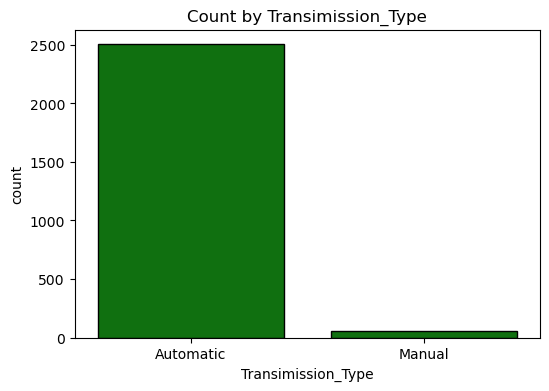

In [8]:
# Create a fig size
plt.figure(figsize=(6,4))

# Plotting the distribution of Transimission_Type column
sns.countplot(data = data, x = 'Transimission_Type', color = 'green', edgecolor = 'black')
plt.title("Count by Transimission_Type")

plt.show()

### b.Origin

In [9]:
# Count
usage_count = data['Usage_Origin'].value_counts().reset_index()
usage_count

,Usage_Origin,count
0,Foreign Used,1542
1,Kenyan Used,1021


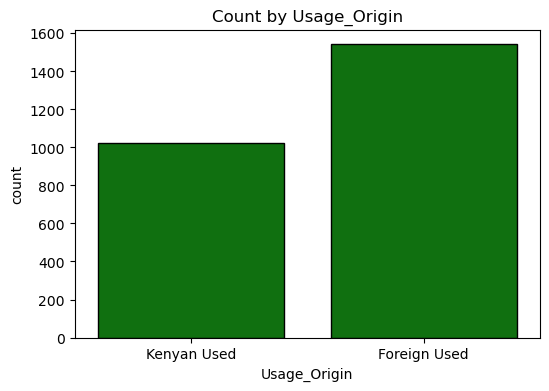

In [10]:
# set figure
plt.figure(figsize = (6,4))
sns.countplot(data = data, x = 'Usage_Origin', color = 'green', edgecolor = 'black')
plt.title("Count by Usage_Origin")

# show the plots
plt.show()

### c. Make

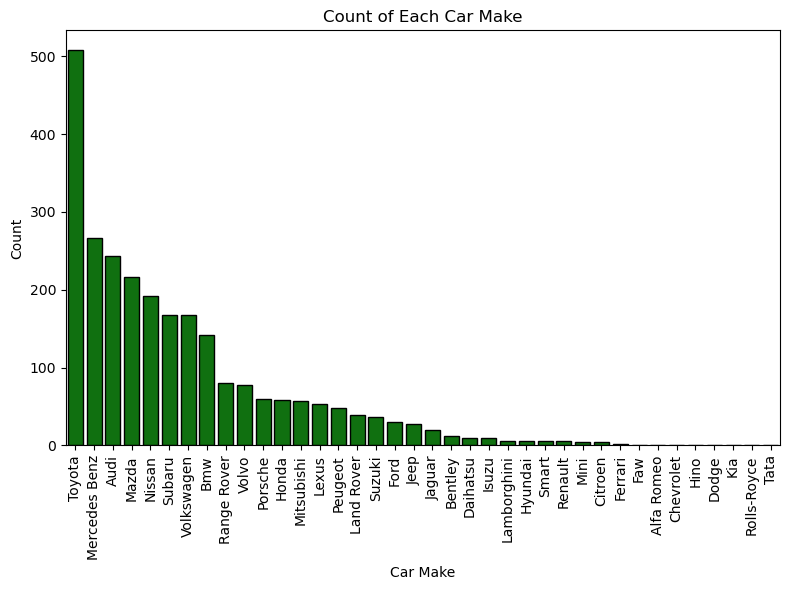

In [11]:
# Get the ordered df
make_counts = data['Make'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Make', order=make_counts, color = 'green', edgecolor = 'black')

# Step 3: Customize the chart
plt.title('Count of Each Car Make')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotates x-axis labels for readability

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

### Top 20 Cars by make

In [12]:
make_counts = data['Make'].value_counts()
make_counts.head(20)

Make
Toyota           508
Mercedes Benz    267
Audi             244
Mazda            216
Nissan           192
Subaru           167
Volkswagen       167
Bmw              142
Range Rover       80
Volvo             78
Porsche           60
Honda             58
Mitsubishi        57
Lexus             53
Peugeot           48
Land Rover        39
Suzuki            36
Ford              30
Jeep              28
Jaguar            20
Name: count, dtype: int64

In [13]:
# Get the ordered df
price_range_count = data ['Price_Range'].value_counts().reset_index()
price_range_count

,Price_Range,count
0,3M-5M,609
1,1M-2M,586
2,2M-3M,453
3,5M-10M,396
4,0-1M,266
5,10M-20M,193
6,20M-30M,39
7,Above 30M,21


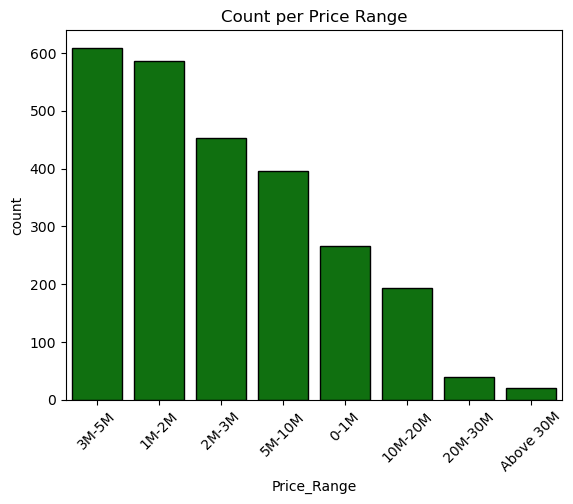

In [14]:
# Visualize in the order
price_range_count = data ['Price_Range'].value_counts().index

# Plot
sns.countplot(data = data, x = 'Price_Range', order = price_range_count, color = 'green', edgecolor = 'black')

# modify
plt.title("Count per Price Range")
plt.xticks(rotation = 45)
          
# Show
plt.show()

Most selling cars are between the price range of 3M-5M and the least are above 30M

### Numerical variables

In [15]:
# Summary statistics
pd.options.display.float_format = '{:.1f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,2556.0,2276.9,911.6,180.0,1600.0,2000.0,2800.0,6750.0
Year,2563.0,2015.3,4.1,1979.0,2014.0,2016.0,2017.0,2024.0
Price,2563.0,4721773.4,6840463.4,26052.0,1650000.0,2999999.0,5199999.0,200639832.8
Car_Age,2563.0,8.7,4.1,0.0,7.0,8.0,10.0,45.0


### a. Engine size

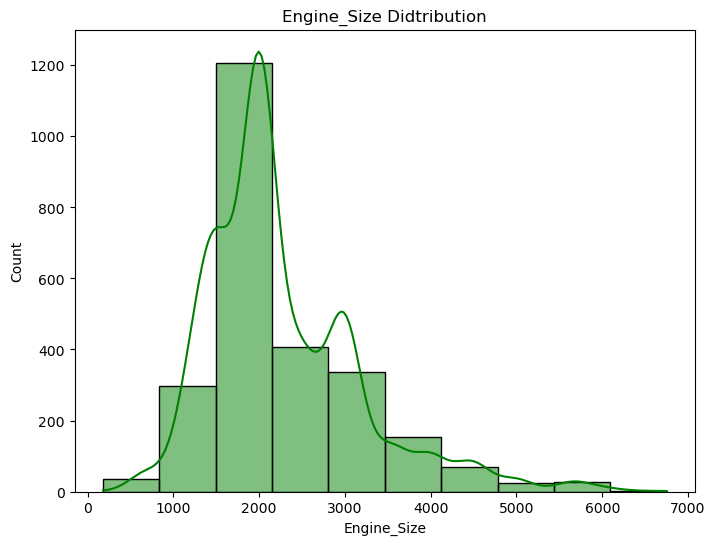

In [16]:
# Create a figure size
plt.figure(figsize = (8, 6))

# plot
sns.histplot(data = data, x = 'Engine_Size', kde = True, color = 'green', bins = 10, edgecolor = 'black')

# Set title
plt.title("Engine_Size Didtribution")

# Show the plot
plt.show()

### b. Car age

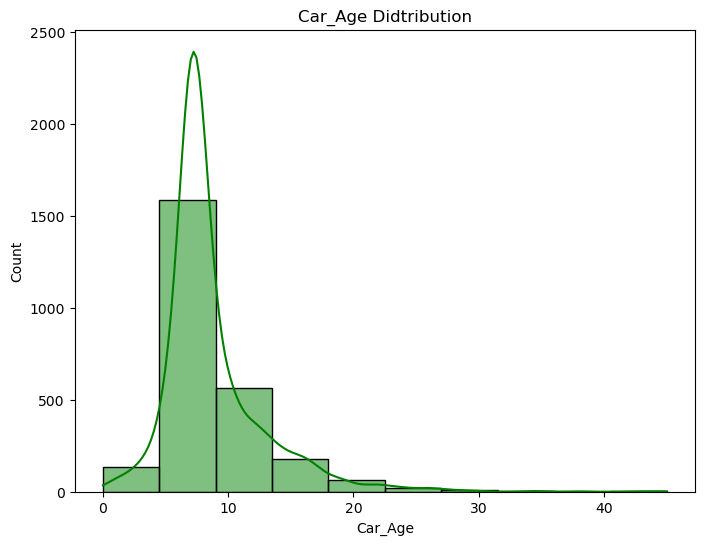

In [17]:
# Create a figure size
plt.figure(figsize = (8, 6))

# plot
sns.histplot(data = data, x = 'Car_Age', kde = True, bins = 10, color = 'green', edgecolor = 'black')

# Set title
plt.title("Car_Age Didtribution")

# Show the plot
plt.show()

In [19]:
# Select the numeric columns 
numeric_columns = data.select_dtypes(include = np.number)
numeric_columns = numeric_columns.drop(columns = ["Year"], axis = 1)

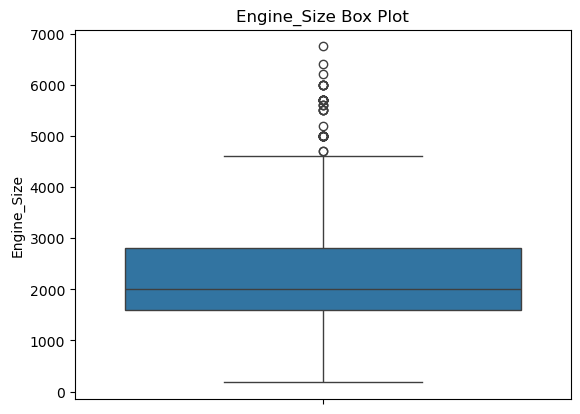

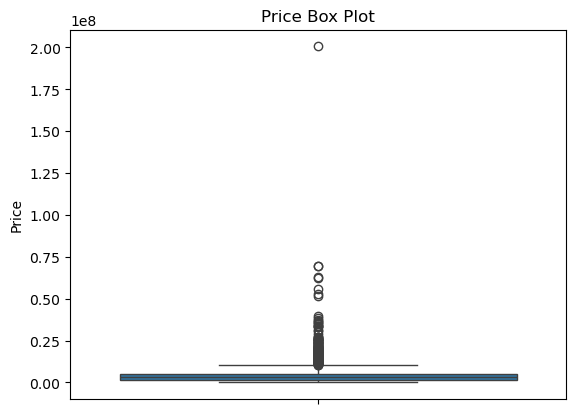

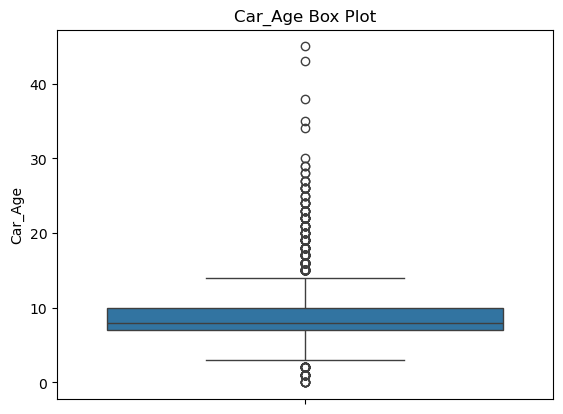

In [20]:
for column in numeric_columns.columns:
    # Create a boxplot for numeric columns
    sns.boxplot(data = numeric_columns[column])

    # Set the title
    plt.title(f"{column} Box Plot")
    
    # Show the plot
    plt.show()

Since the outliers represent true values(e.g., extreme high or low prices of cars, rare/luxury car models, or unique features), then they do not need to be handled in a traditional way (e.g., by removing them/ transforming them).

# Bivariate analysis

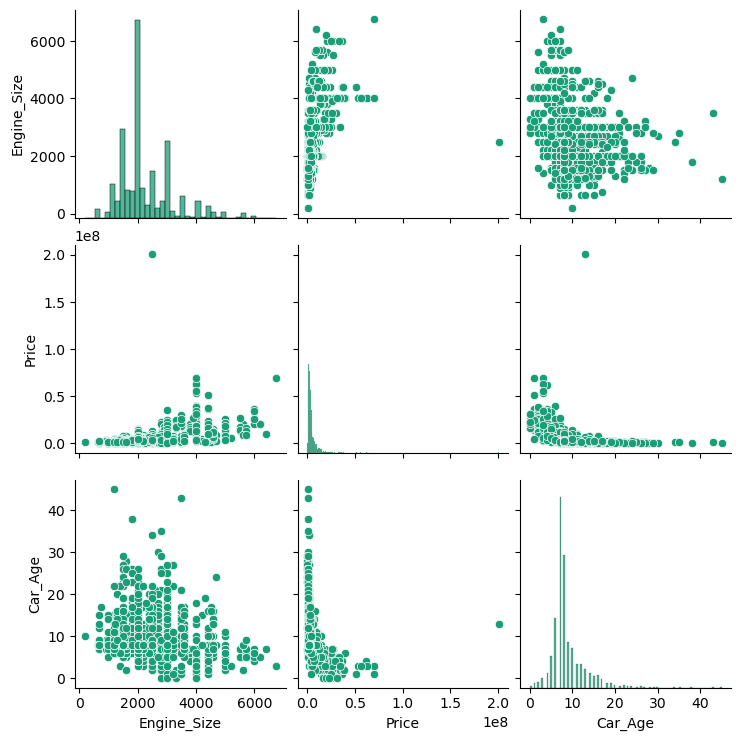

In [21]:
# Set the color
sns.set_palette('Dark2')

# Plot pair plots
sns.pairplot(numeric_columns)

# Show plot
plt.show()

#### Observations

-Engine size has increased in newer vehicles: Comparative analysis indicates that modern vehicles generally feature larger engine displacements compared to their older counterparts.

-Lower engine displacement correlates with reduced vehicle price: A clear inverse relationship exists between engine size and vehicle cost, with more affordable vehicles typically having smaller engine displacements.

-Recent models exhibit higher price points compared to earlier generations: The latest vehicle models tend to command higher price premiums when compared to older versions, reflecting advancements in technology, safety features, and design.

# 3. Multivariate analysis

In [22]:
# Get the correlation matirx
corr_matrix = numeric_columns.corr()
corr_matrix

,Engine_Size,Price,Car_Age
Engine_Size,1.0,0.5,-0.1
Price,0.5,1.0,-0.4
Car_Age,-0.1,-0.4,1.0


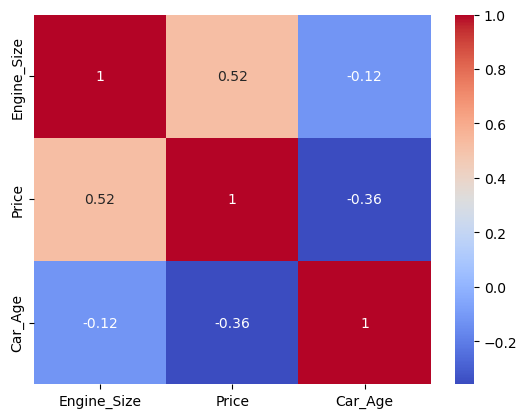

In [23]:
# Plot the heatmap
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

# Show the heatmap
plt.show()

### Observations:

-Engine Size and Price: Larger engine sizes are moderately positively correlated with higher prices. Larger engines tend to mean higher car prices.

-Year and Price: Newer cars are moderately positively correlated with higher prices. Newer cars are generally more expensive.

-Car Age and Price: Older cars have a moderate negative correlation with price. As cars age, their prices generally decrease.

# Descriptive analysisi questions

## 1.Which are the top five and bottom five most expensive vehicles?

In [24]:
# Top 5 most expensive cars
top_5_expensive = data.sort_values(by = 'Price', ascending = False).reset_index(drop = True).head(5)
top_5_expensive

,Name,Transimission_Type,Engine_Size,Usage_Origin,Year,Price,Make,Model,Car_Age,Price_Range
0,Ford Ranger,Manual,2500.0,Kenyan Used,2011,200639832.8,Ford,Ranger,13,Above 30M
1,Rolls-Royce Phantom,Automatic,6750.0,Foreign Used,2021,69783000.0,Rolls-Royce,Phantom,3,Above 30M
2,Lamborghini Urus,Automatic,4000.0,Foreign Used,2023,69500000.0,Lamborghini,Urus,1,Above 30M
3,Lamborghini Urus,Automatic,4000.0,Foreign Used,2021,62659000.0,Lamborghini,Urus,3,Above 30M
4,Lamborghini Urus,Automatic,4000.0,Foreign Used,2020,62110000.0,Lamborghini,Urus,4,Above 30M


In [25]:
# Bottom 5 most expensice cars
bottom_5_expensive = data.sort_values(by = 'Price', ascending = True).reset_index(drop = True).head(5)
bottom_5_expensive

,Name,Transimission_Type,Engine_Size,Usage_Origin,Year,Price,Make,Model,Car_Age,Price_Range
0,Mercedes Benz E350 D,Automatic,3000.0,Foreign Used,2017,26052.0,Mercedes Benz,E350 D,7,0-1M
1,Nissan Sunny Truck B120,Manual,1500.0,Kenyan Used,1995,219999.0,Nissan,Sunny Truck B120,29,0-1M
2,Mitsubishi Galant Gdi,Automatic,2000.0,Kenyan Used,1998,275000.0,Mitsubishi,Galant Gdi,26,0-1M
3,Nissan Sunny,Automatic,1500.0,Kenyan Used,1997,299999.0,Nissan,Sunny,27,0-1M
4,Nissan Primera,Manual,1600.0,Kenyan Used,2001,299999.0,Nissan,Primera,23,0-1M


## 2.Which vehicle makes are the most and least prevalent?

In [26]:
# Top 5 Most prevalent makes
most_prevalent_make = data["Make"].value_counts().head(5).reset_index()
most_prevalent_make

,Make,count
0,Toyota,508
1,Mercedes Benz,267
2,Audi,244
3,Mazda,216
4,Nissan,192


In [27]:
# Bottom 5 most prevalent makes
least_prevalent_make = data["Make"].value_counts().tail(5).reset_index()
least_prevalent_make

,Make,count
0,Hino,1
1,Dodge,1
2,Kia,1
3,Rolls-Royce,1
4,Tata,1


## 3.Do imported vehicles typically command higher prices than locally used Kenyan vehicles?

In [28]:
origin_avg_price = data.groupby('Usage_Origin')['Price'].mean().reset_index()
origin_avg_price

,Usage_Origin,Price
0,Foreign Used,6189701.9
1,Kenyan Used,2504784.4


Foreign used cars are more expensive than Kenyan used cars. Hence imported vehicles typically command higher prices than locally used kenyan vehicles.

## 4.What is the average price of vehicles segmented by transmission type?

In [29]:
origin_avg_price = data.groupby('Transimission_Type')['Price'].mean().reset_index()
origin_avg_price

,Transimission_Type,Price
0,Automatic,4696994.6
1,Manual,5795181.5


Note: There are only 56 manual vehicles in the dataset, so it is imbalanced in terms of the Transmission_Type.

# Conclusion

- The latest vehicle models tend to command higher price premiums when compared to older versions, reflecting advancements in technology, safety features, and design.

- Comparative analysis indicates that modern vehicles generally feature larger engine displacements compared to their older counterparts.

- A clear inverse relationship exist between engine size and vehicle cost, with more affordable vehicles typically having smaller engine displacements

- All the vehicles manufactured in 2024 are foreign used and are more than KES 10M. This is a clear indication that there is a positive correlation between the age and price of the vehicle

- Imported vehicles typically command higher prices than locally used kenyan vehicles.